# Fig06. Researchers classified according to their main research topics, up to five each. 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-muted')

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers and projects data path

In [2]:
file_path_i = "data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [3]:
def prepare_data(investigadores, num_of_topics):
    investigadores = read_csv(file_path_i)
    mini = investigadores[["Temas de investigación","ID investigador"]]
    mini = mini.drop_duplicates(subset ="ID investigador", keep = "first") 
    mini.columns = ["tema", "id"]
    # split Research topics in rows with " | "
    filtered_df = mini.loc[mini["tema"].str.contains(' \|')]
    mini = mini.loc[mini["tema"].str.contains('\|') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for tema in row.tema.split(" | "):
            new_discp.append([tema, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["tema", "id"])
    mini = mini.append(fix_df)
    del_temas = ["Arqueología del paisaje", "Ciencias de la educación", "Diseño, organización y gestión de proyectos"]
    mini = mini[~mini['tema'].isin(del_temas)]
    mini.loc[mini.tema == 'SIG y análisis geoespacial', 'tema'] = "SIG y análisis espacial"
    
    grouped = mini.groupby("tema")
    df_investigadores = grouped.count().sort_values(by=['id'], ascending=False)
    
    
    return df_investigadores

#### Function to translate disciplinary backgrounds

In [4]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = pd.read_csv(f"data/{translations_filename}", sep=';')
    translations_df.columns=["tema", "research_topic"]
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='inner', validate="one_to_many")
    return df_def

#### Run program
## Change 'num_of_topics' to show as many research topics as you want

In [5]:
num_of_topics = 37
investigadores = read_csv(file_path_i)
df2 = prepare_data(investigadores, num_of_topics)
df2 = translate(df2, "tema", "temas.csv")

#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

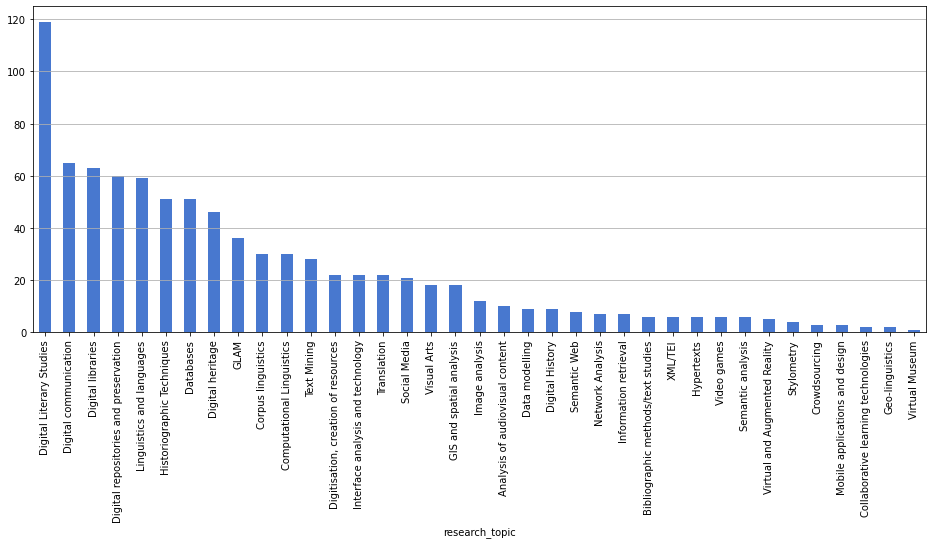

In [6]:
plt.figure()
ax = df2.head(num_of_topics).plot.bar(x="research_topic", figsize=(16,6), legend=False)
ax.set_ylabel("")
# ax.xaxis.tick_top() 
plt.grid(axis='y')
plt.show()

In [7]:
df2

,tema,id,research_topic
0,Estudios literarios digitales,119,Digital Literary Studies
1,Comunicación digital,65,Digital communication
2,Bibliotecas digitales,63,Digital libraries
3,"Archivos digitales, repositorios y preservación",60,Digital repositories and preservation
4,Lingüística y lenguas,59,Linguistics and languages
5,Ciencias y Técnicas Historiográficas,51,Historiographic Techniques
6,Bases de datos,51,Databases
7,Patrimonio digital,46,Digital heritage
8,GLAM,36,GLAM
9,Actividades de corpus,30,Corpus linguistics
